# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

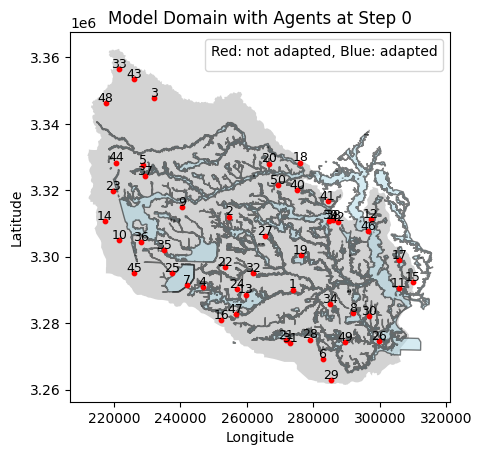

<Figure size 1000x600 with 0 Axes>

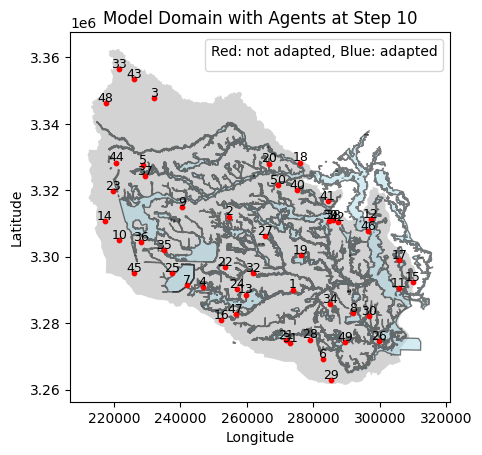

<Figure size 1000x600 with 0 Axes>

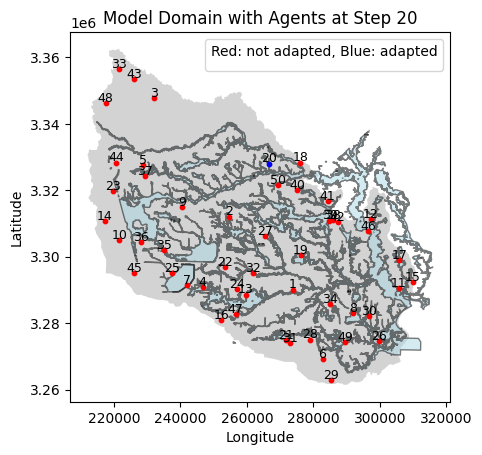

<Figure size 1000x600 with 0 Axes>

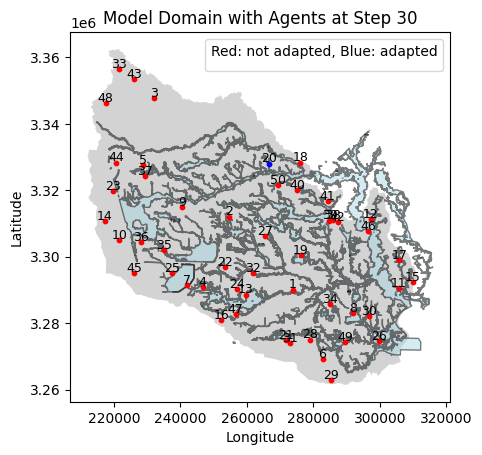

<Figure size 1000x600 with 0 Axes>

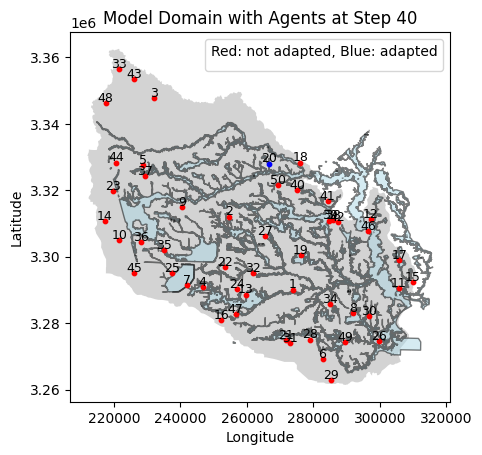

<Figure size 1000x600 with 0 Axes>

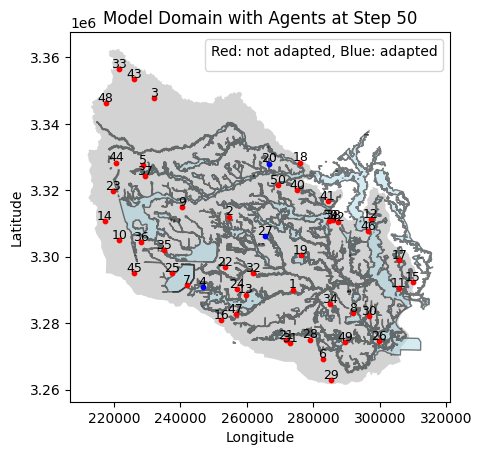

<Figure size 1000x600 with 0 Axes>

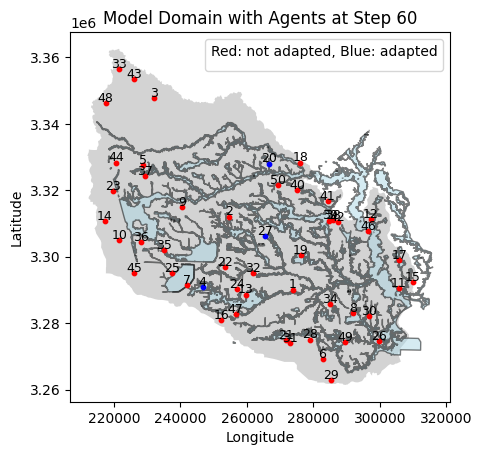

<Figure size 1000x600 with 0 Axes>

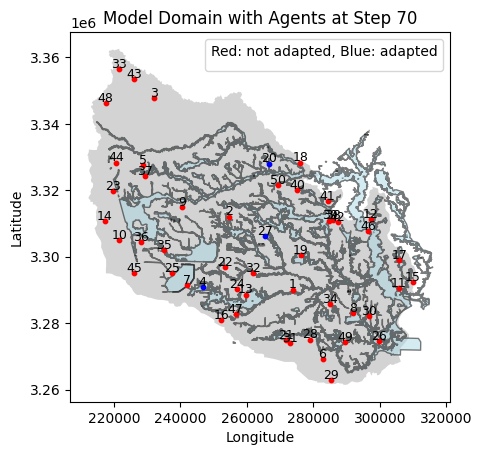

<Figure size 1000x600 with 0 Axes>

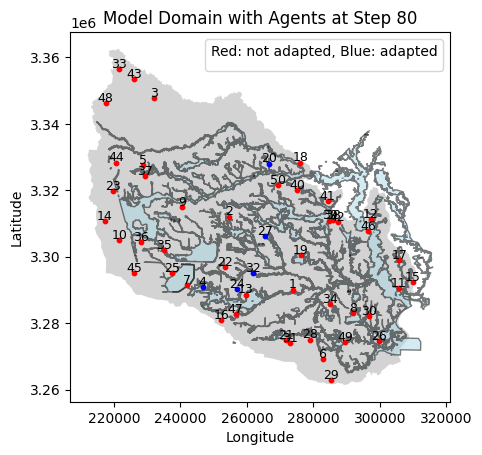

<Figure size 1000x600 with 0 Axes>

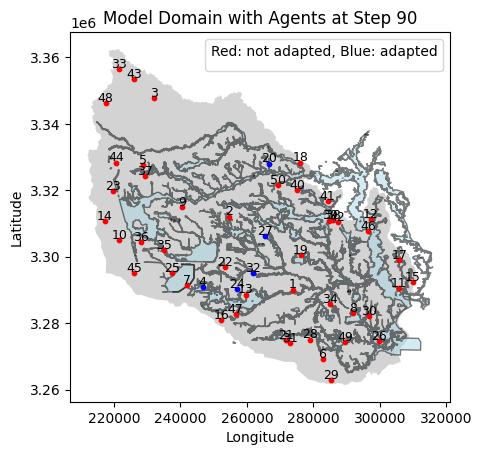

<Figure size 1000x600 with 0 Axes>

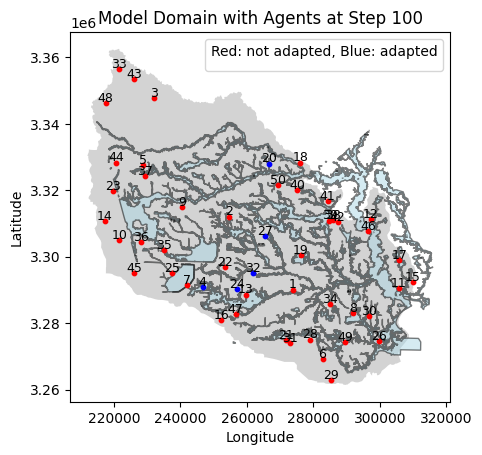

In [10]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="no_network") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Run the model for 100 steps and generate plots every 10 steps.
for step in range(100):
    model.step()

    # Every 10 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps  9, 19, and 29, and so on (which are  10th, 20th, etc.)
    if (step + 1) % 10 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

In [71]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    1                   1.638274              0.734490               0.0   
     2                   0.307804              0.442570               0.0   
     3                   0.000000              0.000000               0.0   
     4                   2.039270              0.772719               0.0   
     5                   0.242981              0.401281               0.0   

              FloodDamageActual  IsAdapted  IsElevated  IsDryproofed  \
Step AgentID                                                           
0    1                      0.0      False       False         False   
     2                      0.0      False       False         False   
     3                      0.0      False       False         False   
     4                      0.0      False       False         False   
     5                      0.0      False       False         False   

              IsWetproofed  Income  Savings   Age  \
Step AgentID                                        
0    1               False    3473   6946.0  27.0   
     2               False    4740   4740.0  74.0   
     3               False    3365   6730.0  54.0   
     4               False    8432  25296.0  43.0   
     5               False   13965  41895.0  23.0   

                                                   location  
Step AgentID                                                 
0    1        POINT (273858.34512295865 3290114.5996907367)  
     2         POINT (254752.69560778048 3312127.371176284)  
     3         POINT (232007.00350843044 3347791.068642322)  
     4        POINT (246668.02579108134 3290954.1680667377)  
     5          POINT (228794.806355329 3327513.2473666207)

In [69]:
import pandas as pd
agent_data.reset_index(inplace=True)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
agent_data[agent_data["AgentID"]==20]
# Reset display options to default 
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

,Step,AgentID,FloodDepthEstimated,FloodDamageEstimated,FloodDepthActual,FloodDamageActual,IsAdapted,IsElevated,IsDryproofed,IsWetproofed,Income,Savings,Age,location
19,0,20,4.376776,0.906064,0.000000,0.000000,False,False,False,False,3581,10743.000000,31.00,POINT (266614.75454851385 3328047.9483049754)
69,1,20,4.376776,0.906064,0.000000,0.000000,False,False,False,False,3581,12354.450000,31.25,POINT (266614.75454851385 3328047.9483049754)
119,2,20,4.376776,0.906064,0.000000,0.000000,False,False,False,False,3581,15040.200000,31.50,POINT (266614.75454851385 3328047.9483049754)
169,3,20,4.376776,0.906064,0.000000,0.000000,False,False,False,False,3581,17725.950000,31.75,POINT (266614.75454851385 3328047.9483049754)
219,4,20,4.376776,0.906064,0.000000,0.000000,False,False,False,False,3581,20411.700000,32.00,POINT (266614.75454851385 3328047.9483049754)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,95,20,4.376776,0.543638,2.512727,0.485503,True,False,False,True,3581,14608.108179,54.75,POINT (266614.75454851385 3328047.9483049754)
4819,96,20,4.376776,0.543638,2.512727,0.485503,True,False,False,True,3581,15145.258179,55.00,POINT (266614.75454851385 3328047.9483049754)
4869,97,20,4.376776,0.543638,2.512727,0.485503,True,False,False,True,3581,16219.558179,55.25,POINT (266614.75454851385 3328047.9483049754)
4919,98,20,4.376776,0.543638,2.512727,0.485503,True,False,False,True,3581,14597.602361,55.50,POINT (266614.75454851385 3328047.9483049754)


In [73]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,total_adapted_households,total_dryproofed_households,total_wetproofed_households,total_elevated_households
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
95,5,2,3,0
96,5,2,3,0
97,5,2,3,0
98,5,2,3,0


**Trying Some functions** - can delete later

In [45]:
# Try the income function
import random
def generate_income(alpha=1, beta=3000):
    while True:
        income = random.gammavariate(alpha, beta)
        if 1000 <= income <= 50000:
            return int(income)
        
generate_income()

5937

In [ ]:
# Try Expected Utility function
from functions import calculate_EU
measures = {'elevation':[20000,0.9],'dryproofing':[4000,0.7],'wetproofing':[3000,0.5]}
# Calculate_EU(savings, flood_probability, flood_damage, measure_information)
print(calculate_EU(30000, 0.5, 0.8 , measures))


In [ ]:
def calculate_saving(income, savings, saving_threshold= 0.25):
    # Generating a random number between 0 and 1
    saving_rate = 0.05
        # select consumption rate from the list
    consumption_rate = random.choice([0.05, 0.1, 0.15, 0.2, 0.25])  
        #random.seed(self.model.seed)
    if random.random() > saving_threshold:
        # Agent saves
        amount_saved = income * saving_rate *3 # quarterly saving
        savings += amount_saved
    else:
        # Agent consumes from their savings (for other purposes)
        amount_consumed = savings * consumption_rate # it is already quarterly
        savings -= amount_consumed

    return savings

In [ ]:
calculate_saving(3000, 1000, 0.5)

In [255]:
from functions import generate_random_number
# mean min max std
x = generate_random_number(6000, 5000, 10000, 1500)
print(x)

6388


In [473]:
import random as random

while True:
    income = random.gammavariate(1, 3000)
    if 1000 <= income <= 50000: # min and max cap for income
        break
print(income)   

1492.4402183932393
